Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_colab/water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


## Задание 1

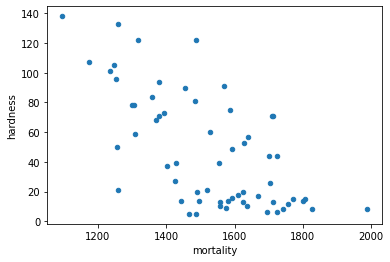

In [ ]:
# Построить точечный график, 'mortality' - смертность, 'hardness' - жесткость воды
df.plot(kind='scatter', x='mortality', y='hardness')

Вывод - по графику наблюдается обратная взаимосвязь

In [ ]:
# Рассчитать коэффициенты корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# и Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Коэффициенты отрицательные - небольшая отрицательная заисимость, то есть чем больше смертность, тем ниже жесткость воды

In [ ]:
# Построить модель линейной регрессии

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['mortality']]
y = df['hardness']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(42, 1)

In [ ]:
y_train.shape

(42,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучение

LinearRegression()

In [ ]:
model.coef_

array([-0.12670202])

In [ ]:
model.intercept_

239.3678426140957

In [ ]:
# зависимость - y = -0.12x + 239.37

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [ ]:
y_test

0     105
5      10
46     14
31     44
13     78
55     20
34    133
49     75
12     21
40      6
33     59
59     81
16     39
3      14
53     71
17     39
8      10
6      15
41    101
Name: hardness, dtype: int64

In [ ]:
# Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.4948982822876836

коэффициент детерминации посередине между 0 и 1, зависимость данных ниже среднего

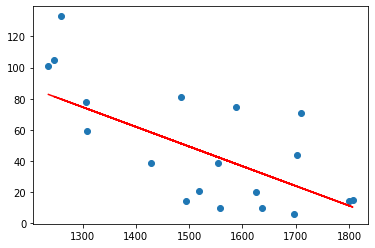

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

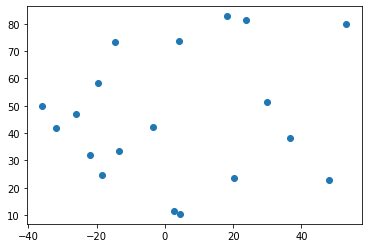

In [ ]:
# Вывести график остатков

residuals = y_test - y_pred
plt.scatter(residuals, y_pred)
plt.show()

## Задание 2

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### Данные по югу

In [ ]:
# данные только по югу
df_south = df.loc[df['location'] == 'South']
df_south

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


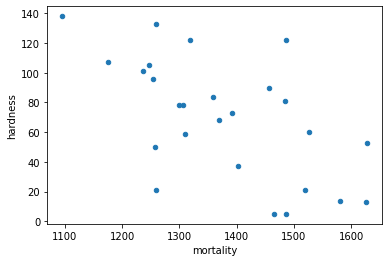

In [ ]:
df_south.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# коэфф Пирсона
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
# коэфф Спирмана
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
# построение модели юг
X_s = df_south[['mortality']]
y_s = df_south['hardness']

In [ ]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.30, random_state=42)

In [ ]:
X_s_train.shape

(18, 1)

In [ ]:
y_s_train.shape

(18,)

In [ ]:
model = LinearRegression()
model.fit(X_s_train, y_s_train)  # обучение

LinearRegression()

In [ ]:
model.coef_

array([-0.18112812])

In [ ]:
model.intercept_

324.1190746235986

In [ ]:
# уравнение: y = -0.18x +324

In [ ]:
y_s_pred = model.predict(X_s_test)
y_s_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

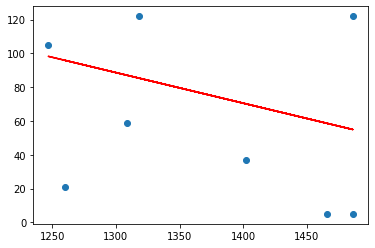

In [ ]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

In [ ]:
# Рассчитать коэффициент детерминации юг
model.score(X_s_test, y_s_test)

-0.05226615794483802

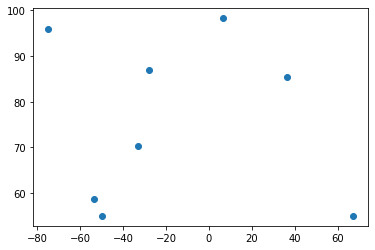

In [ ]:
# Вывести график остатков юг

residuals_s = y_s_test - y_s_pred
plt.scatter(residuals_s, y_s_pred)
plt.show()

Вывод: коэфф детерминации близкий к нулю, зависимость очень слабая, коэфф Пирсона и Спирмена меньше, чем на всех данных, зависимость меньше

### Данные по северу

In [ ]:
# данные только по северу
df_north = df.loc[df['location'] == 'North']
df_north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


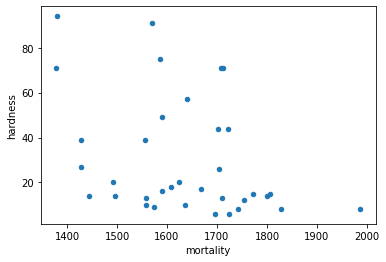

In [ ]:
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# коэфф Пирсона север
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# коэфф Спирмана север
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
# построение модели север
X_n = df_north[['mortality']]
y_n = df_north['hardness']

In [ ]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [ ]:
X_n_train.shape

(24, 1)

In [ ]:
y_n_train.shape

(24,)

In [ ]:
model = LinearRegression()
model.fit(X_n_train, y_n_train)  # обучение

LinearRegression()

In [ ]:
model.coef_

array([-0.09774218])

In [ ]:
model.intercept_

191.7279767911201

In [ ]:
# уравнение y = -0.09x + 192

In [ ]:
y_n_pred = model.predict(X_n_test)
y_n_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [ ]:
y_n_test

45     8
23     9
43    14
36     6
26    16
50    71
31    44
22     8
16    39
28    15
17    39
Name: hardness, dtype: int64

In [ ]:
# Рассчитать коэффициент детерминации север
model.score(X_n_test, y_n_test)

-0.34863672627416764

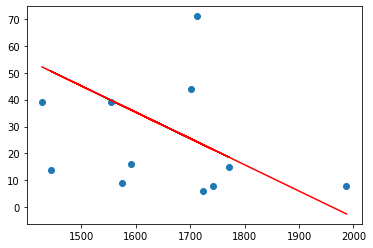

In [ ]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

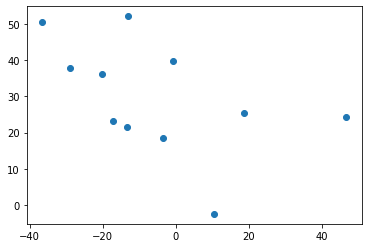

In [ ]:
# Вывести график остатков север

residuals_n = y_n_test - y_n_pred
plt.scatter(residuals_n, y_n_pred)
plt.show()

Вывод: коэфф детерминации выше, чем по югу, но ниже, чем по всем данным, зависимость слабая, коэфф Пирсона и Спирмена меньше, чем на всех данных, зависимость меньше

> Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?


Нет, для юга совсем не сохраняется, по северу гораздо меньше, чем на всех данных